# Coupling SCME-cpp to GPAW

This branch of GPAW : CouplingToCPP

This branch of ASE : CouplingToCPP

This branch of SCME-cpp : CouplingToQMMM

## Compiling SCME-cpp

Requires python3+ with pybind11 and any recent cmake.

In source do

```bash
$ git clone https://gitlab.com/AnoopANair/scmecpp.git source
$ git checkout CouplingToQMMM
```

```bash
$ cd FSCME_QMMM3_loopHeap
$ ./ex.sh
```

Add to ".bashrc"

```bash
export PYTHONPATH=~/source/FSCME_QMMM3_loopHeap/build:$PYTHONPATH
export PYTHONPATH=~/source:$PYTHONPATH
```

The SCME-cpp code is addressed with the calculator object "SCME_PS" in "ase_interface.py" 

```python
from FSCME_QMMM3_loopHeap.ase_interface import SCME_PS
```

## First Test

At the moment only the QMMM electrostatics are coupled with SCME-cpp. Below is the water dimer binding curve for a SCME-cpp and PBE water, on top of a graphene sheet with one boron atom. Dispersion and repulsion are calculated with the old SCME-fortran disp/rep interface. 

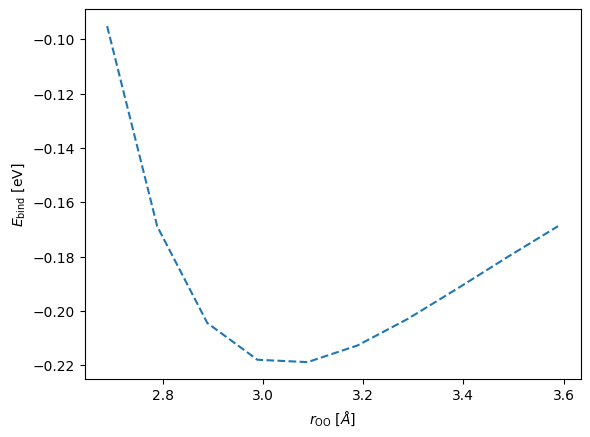

In [5]:
from matplotlib import pyplot as plt
import numpy as np

E = np.array([-0.09518658, -0.16889102, -0.20445056, 
              -0.21798046, -0.21885081, -0.21269675,
              -0.20295022, -0.19167145, -0.18006877, -0.16882316])
rOO = np.array([2.68893987, 2.78893987, 2.88893987, 
                2.98893987, 3.08893987, 3.18893987,
                3.28893987, 3.38893987, 3.48893987, 3.58893987])

plt.plot(rOO, E, '--')
plt.xlabel("$r_\mathrm{OO}$ [$\AA$]")
plt.ylabel("$E_\mathrm{bind}$ [eV]")
plt.show()

In [1]:
from ase.visualize import view
from ase.io import read

atoms = read("../data/dimer_on_bgraphene.xyz")
shift = [10, -10, 5]
atoms.set_positions(atoms.get_positions() - shift)
atoms.rotate(270, "x")
view(atoms, viewer="x3d")

The minimum in the water dimer PES is at too large oxygen-oxygen distance, whereas the binding energy is fine ($-0.219$ eV). The electrostatic parameters of this SCME-cpp model are very similar to the old rigid model but the electrostatic damping is different and the electrostatic damping functions are based on a rigurous derivation. Hence the interaction between SCME-cpp and PBE water needs tuning as well as a switch to a consistent dispersion and repulsion function. 

    a) using the wrong dispersion / repulsion function 
    b) using a non optimal electrostatic damping parameter.